In [1]:
import pandas as pd 
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 210327]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999


In [4]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [5]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [6]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,2021-01-02 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877,2021-01-02 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930,2021-01-02 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968,2021-01-02 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999,2021-01-02 19:00:00


In [7]:
turnstiles_daily["DAILY_ENTRIES"] = (turnstiles_daily
                                     .groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]]
                                     .diff())
turnstiles_daily.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/03/2021,7512008,355.0
2,A002,R051,02-00-00,59 ST,01/04/2021,7512222,214.0
3,A002,R051,02-00-00,59 ST,01/05/2021,7512764,542.0
4,A002,R051,02-00-00,59 ST,01/06/2021,7513302,538.0
5,A002,R051,02-00-00,59 ST,01/07/2021,7513798,496.0


In [8]:
turnstiles_daily[(turnstiles_daily.ENTRIES ==0) & (turnstiles_daily.DAILY_ENTRIES < 0)]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
66633,H007A,R248,02-05-00,1 AV,02/16/2021,0,-262584.0
93029,N012,R035,01-05-00,168 ST,02/21/2021,0,-11.0
103586,N049,R084,01-05-01,59 ST COLUMBUS,02/05/2021,0,-589824.0
133927,N114,R297,01-05-01,FRANKLIN AV,03/04/2021,0,-67108864.0
143733,N181A,R464,00-05-00,AQUEDUCT RACETR,02/15/2021,0,-393218.0
236886,PTH02,R544,00-06-03,HARRISON,02/13/2021,0,-449.0
238214,PTH03,R552,00-01-01,JOURNAL SQUARE,01/28/2021,0,-5199.0
246221,PTH11,R545,00-00-02,14TH STREET,02/12/2021,0,-569087.0
246223,PTH11,R545,00-00-02,14TH STREET,02/14/2021,0,-131.0
246231,PTH11,R545,00-00-02,14TH STREET,02/22/2021,0,-3782.0


In [9]:
turnstiles_daily[(turnstiles_daily.ENTRIES != 0) & (turnstiles_daily.DAILY_ENTRIES < 0)]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
416,A002,R051,02-03-02,59 ST,03/23/2021,299,-6641139.0
3275,A011,R080,01-03-00,57 ST-7 AV,01/03/2021,885629423,-127.0
3276,A011,R080,01-03-00,57 ST-7 AV,01/04/2021,885629327,-96.0
3277,A011,R080,01-03-00,57 ST-7 AV,01/05/2021,885629131,-196.0
3278,A011,R080,01-03-00,57 ST-7 AV,01/06/2021,885628901,-230.0
...,...,...,...,...,...,...,...
415504,R730,R431,00-00-04,EASTCHSTER/DYRE,03/22/2021,1559819443,-54.0
415505,R730,R431,00-00-04,EASTCHSTER/DYRE,03/23/2021,1559819287,-156.0
415506,R730,R431,00-00-04,EASTCHSTER/DYRE,03/24/2021,1559819090,-197.0
415507,R730,R431,00-00-04,EASTCHSTER/DYRE,03/25/2021,1559818905,-185.0


In [10]:
turnstiles_daily["FIXED_DAILY_ENTRIES"]=(
np.where((
    (turnstiles_daily.ENTRIES ==0) & (turnstiles_daily.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET0 
    , 
    np.where((turnstiles_daily.ENTRIES !=0) & (turnstiles_daily.DAILY_ENTRIES < 0)
             , abs(turnstiles_daily.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
         turnstiles_daily.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))

In [11]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['FIXED_DAILY_ENTRIES']].sum().reset_index()

In [12]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['FIXED_DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,FIXED_DAILY_ENTRIES
0,1 AV,01/03/2021,3691.0
1,1 AV,01/04/2021,2525.0
2,1 AV,01/05/2021,5328.0
3,1 AV,01/06/2021,5468.0
4,1 AV,01/07/2021,5610.0


In [13]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('FIXED_DAILY_ENTRIES', ascending=False)\
    .reset_index()

Text(0.5, 1.0, 'Min 5')

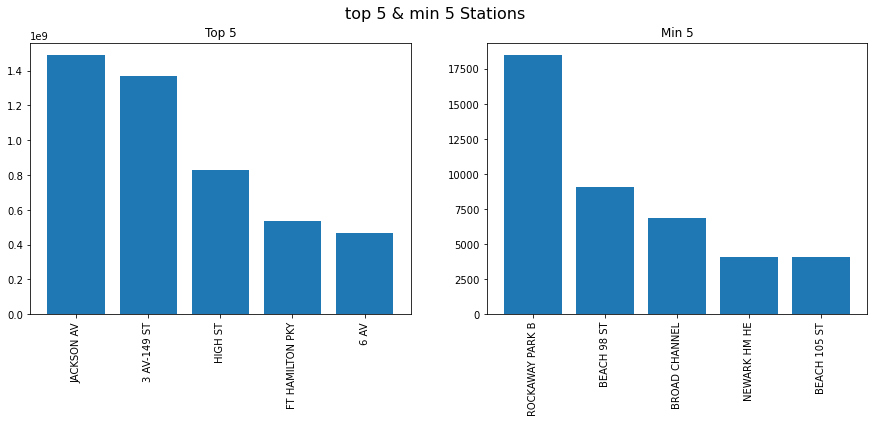

In [14]:
plt.figure(figsize=[15,5])

plt.suptitle('top 5 & min 5 Stations',fontsize = 16)
plt.subplot(1,2,1)
plt.bar(x=station_totals['STATION'][:5], height=station_totals['FIXED_DAILY_ENTRIES'][:5])
plt.xticks(rotation=90);
plt.title('Top 5')

plt.subplot(1,2,2)
plt.bar(x=station_totals['STATION'][-5:], height=station_totals['FIXED_DAILY_ENTRIES'][-5:])
plt.xticks(rotation=90);
plt.title('Min 5')



In [17]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "PTH02") & 
(turnstiles_daily["UNIT"] == "R544") & 
(turnstiles_daily["SCP"] == "00-06-03") & 
(turnstiles_daily["STATION"] == "HARRISON")]

single_turnstile.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
236845,PTH02,R544,00-06-03,HARRISON,01/03/2021,421,2.0,2.0
236846,PTH02,R544,00-06-03,HARRISON,01/04/2021,421,0.0,0.0
236847,PTH02,R544,00-06-03,HARRISON,01/05/2021,422,1.0,1.0
236848,PTH02,R544,00-06-03,HARRISON,01/06/2021,422,0.0,0.0
236849,PTH02,R544,00-06-03,HARRISON,01/07/2021,422,0.0,0.0
236850,PTH02,R544,00-06-03,HARRISON,01/08/2021,423,1.0,1.0
236851,PTH02,R544,00-06-03,HARRISON,01/09/2021,424,1.0,1.0
236852,PTH02,R544,00-06-03,HARRISON,01/10/2021,425,1.0,1.0
236853,PTH02,R544,00-06-03,HARRISON,01/11/2021,425,0.0,0.0
236854,PTH02,R544,00-06-03,HARRISON,01/12/2021,426,1.0,1.0


Text(0.5, 1.0, 'Daily Entries for Turnstile HARRISON')

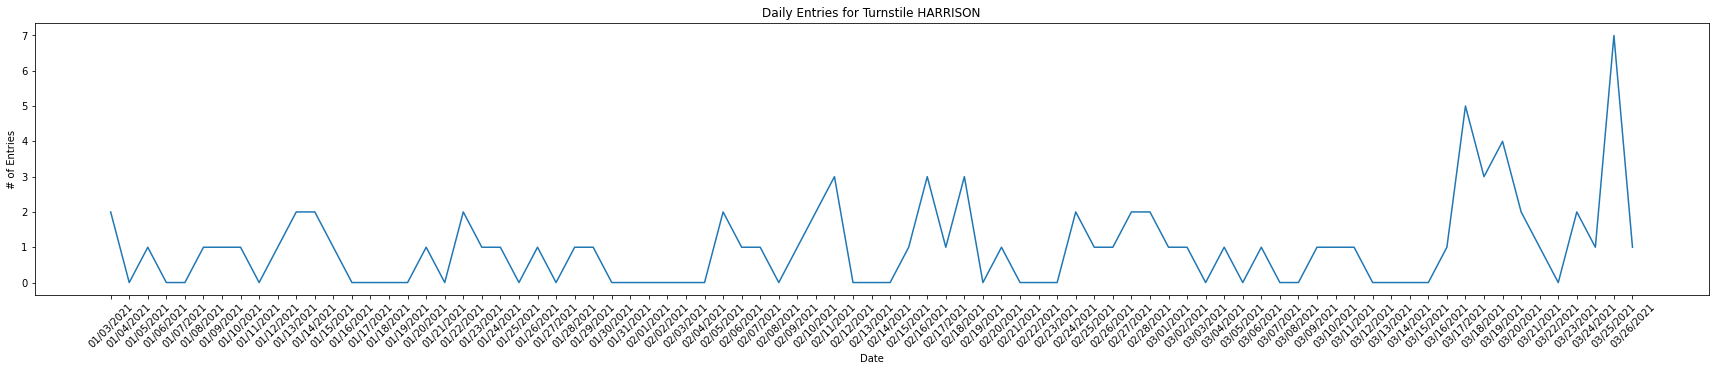

In [18]:
plt.figure(figsize=(30,5))
plt.plot(single_turnstile['DATE'], single_turnstile['FIXED_DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile HARRISON')


In [19]:
single_turnstile1 = turnstiles_daily[(turnstiles_daily["C/A"] == "A002") & 
(turnstiles_daily["UNIT"] == "R051") & 
(turnstiles_daily["SCP"] == "02-00-00") & 
(turnstiles_daily["STATION"] == "59 ST")]

single_turnstile1.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/03/2021,7512008,355.0,355.0
2,A002,R051,02-00-00,59 ST,01/04/2021,7512222,214.0,214.0
3,A002,R051,02-00-00,59 ST,01/05/2021,7512764,542.0,542.0
4,A002,R051,02-00-00,59 ST,01/06/2021,7513302,538.0,538.0
5,A002,R051,02-00-00,59 ST,01/07/2021,7513798,496.0,496.0
6,A002,R051,02-00-00,59 ST,01/08/2021,7514334,536.0,536.0
7,A002,R051,02-00-00,59 ST,01/09/2021,7514863,529.0,529.0
8,A002,R051,02-00-00,59 ST,01/10/2021,7515235,372.0,372.0
9,A002,R051,02-00-00,59 ST,01/11/2021,7515509,274.0,274.0
10,A002,R051,02-00-00,59 ST,01/12/2021,7516043,534.0,534.0


Text(0.5, 1.0, 'Daily Entries for Turnstile 59 ST')

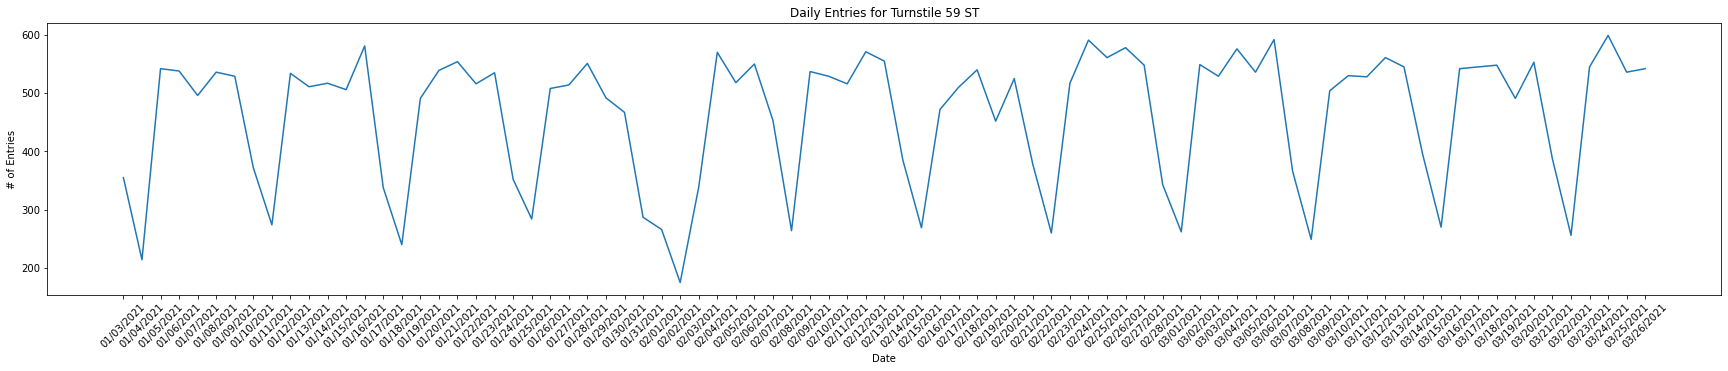

In [20]:
plt.figure(figsize=(30,5))
plt.plot(single_turnstile1['DATE'], single_turnstile1['FIXED_DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile 59 ST')


In [21]:
single_turnstile2 = turnstiles_daily[(turnstiles_daily["C/A"] == "R730") & 
(turnstiles_daily["UNIT"] == "R431") & 
(turnstiles_daily["SCP"] == "00-00-04") & 
(turnstiles_daily["STATION"] == "EASTCHSTER/DYRE")]

single_turnstile2.head(10)



,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
415426,R730,R431,00-00-04,EASTCHSTER/DYRE,01/03/2021,1559828953,-62.0,62.0
415427,R730,R431,00-00-04,EASTCHSTER/DYRE,01/04/2021,1559828892,-61.0,61.0
415428,R730,R431,00-00-04,EASTCHSTER/DYRE,01/05/2021,1559828700,-192.0,192.0
415429,R730,R431,00-00-04,EASTCHSTER/DYRE,01/06/2021,1559828563,-137.0,137.0
415430,R730,R431,00-00-04,EASTCHSTER/DYRE,01/07/2021,1559828424,-139.0,139.0
415431,R730,R431,00-00-04,EASTCHSTER/DYRE,01/08/2021,1559828184,-240.0,240.0
415432,R730,R431,00-00-04,EASTCHSTER/DYRE,01/09/2021,1559828033,-151.0,151.0
415433,R730,R431,00-00-04,EASTCHSTER/DYRE,01/10/2021,1559827976,-57.0,57.0
415434,R730,R431,00-00-04,EASTCHSTER/DYRE,01/11/2021,1559827925,-51.0,51.0
415435,R730,R431,00-00-04,EASTCHSTER/DYRE,01/12/2021,1559827759,-166.0,166.0


Text(0.5, 1.0, 'Daily Entries for EASTCHSTER/DYRE')

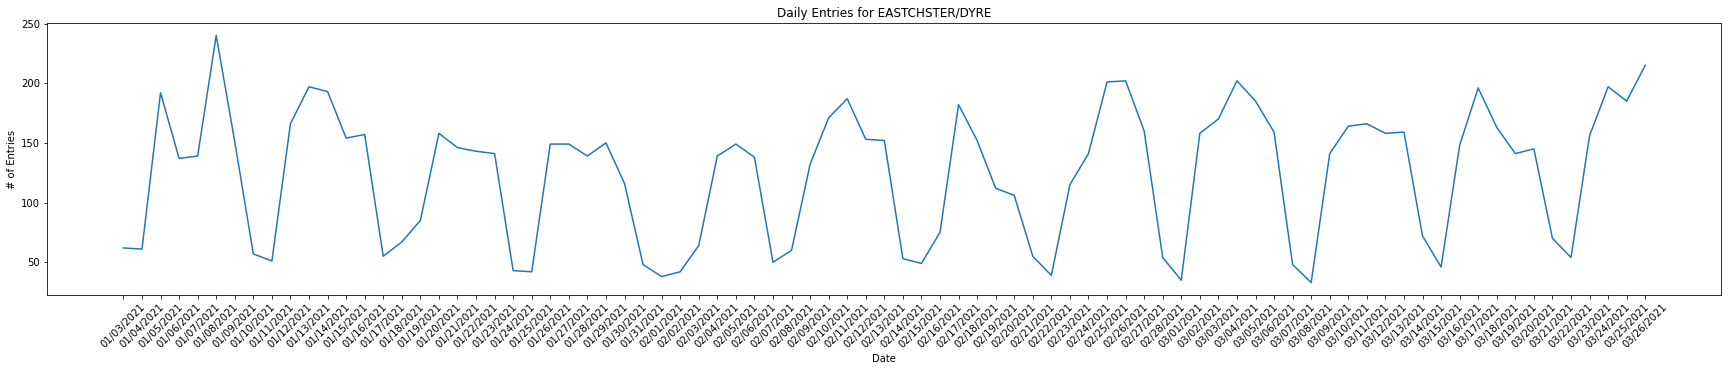

In [22]:
plt.figure(figsize=(30,5))
plt.plot(single_turnstile2['DATE'], single_turnstile2['FIXED_DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for EASTCHSTER/DYRE')
